In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

In [2]:
df= pd.read_csv("/home/hesham/NMG/8-25/cleaned_ncr_data8-25.csv")
df.columns

Index(['ID', 'Month', 'Record_Date', 'Source', '100', 'Column1', 'Code',
       'Column2', 'Forms_Used', 'Event_Area', 'Equipment_Tool', 'Department',
       'Reporter_ID', 'Reporter_Name', 'Report_Editor', 'Description', 'Cause',
       'Shift', 'Risk_Level', 'Sent', 'Corrective_Action', 'Applied_By',
       'Target_Date', 'On_Progress', 'Follow_Up', 'Followed_By', 'Close_Date',
       'Closed_On_Time', 'Penalty_Case', 'Unnamed: 29', 'Unnamed: 30',
       'Notes'],
      dtype='object')

In [3]:
df_groubed=df['Department'].groupby(df['Follow_Up']).count()#.unstack()
df_groubed

Follow_Up
Closed    23
Opened     2
Name: Department, dtype: int64

In [4]:
df.groupby('Department',observed=True)['Follow_Up'].count().to_frame("Cases")

,Cases
Department,
Administrative Affairs,4
Binding,2
Engineering Department,5
IT,1
Production,1
Sheet Printing,1
Stores,1
Web,10


In [5]:
dep_caces=df.groupby('Department',observed=True)['Follow_Up'].count().to_frame("Cases")
dep_caces

,Cases
Department,
Administrative Affairs,4
Binding,2
Engineering Department,5
IT,1
Production,1
Sheet Printing,1
Stores,1
Web,10


In [6]:
Monthly=df.groupby('Month')['Follow_Up'].count()
Monthly

Month
أغسطس-25    12
يوليو-25    13
Name: Follow_Up, dtype: int64

In [7]:
reporter_score=df.groupby('Reporter_Name')['Follow_Up'].count()
reporter_score

Reporter_Name
Ahmed Morsi Morsi          14
Ahmed Saad Tolba            2
Alaa Antar Mohamed          1
Ali Salah Ali               3
Karim Magdy Ahmed           1
Mohamed Mahmoud Abdelal     1
Mohamed Moussa Ismail       3
Name: Follow_Up, dtype: int64

In [8]:
df.groupby('Department')['Follow_Up'].count().unique()

array([ 4,  2,  5,  1, 10])

In [9]:
df.groupby(['Month', 'Follow_Up','Department'])['Follow_Up'].count().unstack().fillna(0).astype(int)

Department          Administrative Affairs  Binding  Engineering Department  \
Month    Follow_Up                                                            
أغسطس-25 Closed                          2        2                       4   
         Opened                          0        0                       0   
يوليو-25 Closed                          2        0                       1   
         Opened                          0        0                       0   

Department          IT  Production  Sheet Printing  Stores  Web  
Month    Follow_Up                                               
أغسطس-25 Closed      0           0               0       1    2  
         Opened      0           0               0       0    1  
يوليو-25 Closed      0           1               1       0    7  
         Opened      1           0               0       0    0

In [10]:
dep_month_folow=df.groupby(['Department', 'Follow_Up','Month'])['Follow_Up'].count().unstack().fillna(0).astype(int)
dep_month_folow

Month                             أغسطس-25  يوليو-25
Department             Follow_Up                    
Administrative Affairs Closed            2         2
Binding                Closed            2         0
Engineering Department Closed            4         1
IT                     Opened            0         1
Production             Closed            0         1
Sheet Printing         Closed            0         1
Stores                 Closed            1         0
Web                    Closed            2         7
                       Opened            1         0

In [11]:
Reporter_month_folow=df.groupby(['Reporter_Name', 'Follow_Up','Month'])['Follow_Up'].count().unstack().fillna(0).astype(int)
Reporter_month_folow

Month                              أغسطس-25  يوليو-25
Reporter_Name           Follow_Up                    
Ahmed Morsi Morsi       Closed            5         9
Ahmed Saad Tolba        Closed            1         1
Alaa Antar Mohamed      Closed            1         0
Ali Salah Ali           Closed            1         1
                        Opened            1         0
Karim Magdy Ahmed       Closed            1         0
Mohamed Mahmoud Abdelal Closed            1         0
Mohamed Moussa Ismail   Closed            1         1
                        Opened            0         1

In [12]:
Reporter_department=df.groupby(['Reporter_Name', 'Department','Month'])['Follow_Up'].count().unstack().fillna(0).astype(int)
Reporter_department

Month                                           أغسطس-25  يوليو-25
Reporter_Name           Department                                
Ahmed Morsi Morsi       Administrative Affairs         0         2
                        Binding                        1         0
                        Engineering Department         2         1
                        Production                     0         1
                        Sheet Printing                 0         1
                        Web                            2         4
Ahmed Saad Tolba        Engineering Department         1         0
                        Web                            0         1
Alaa Antar Mohamed      Engineering Department         1         0
Ali Salah Ali           Binding                        1         0
                        Web                            1         1
Karim Magdy Ahmed       Stores                         1         0
Mohamed Mahmoud Abdelal Administrative Affairs         1         0
Mohamed Moussa Ismail   Administrative Affairs         1         0
                        IT                             0         1
                        Web                            0         1

In [13]:
Reporter_department_folow=df.groupby(['Reporter_Name', 'Department','Month','Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
Reporter_department_folow

Follow_Up                                                Closed  Opened
Reporter_Name           Department             Month                   
Ahmed Morsi Morsi       Administrative Affairs يوليو-25       2       0
                        Binding                أغسطس-25       1       0
                        Engineering Department أغسطس-25       2       0
                                               يوليو-25       1       0
                        Production             يوليو-25       1       0
                        Sheet Printing         يوليو-25       1       0
                        Web                    أغسطس-25       2       0
                                               يوليو-25       4       0
Ahmed Saad Tolba        Engineering Department أغسطس-25       1       0
                        Web                    يوليو-25       1       0
Alaa Antar Mohamed      Engineering Department أغسطس-25       1       0
Ali Salah Ali           Binding                أغسطس-25       1       0
                        Web                    أغسطس-25       0       1
                                               يوليو-25       1       0
Karim Magdy Ahmed       Stores                 أغسطس-25       1       0
Mohamed Mahmoud Abdelal Administrative Affairs أغسطس-25       1       0
Mohamed Moussa Ismail   Administrative Affairs أغسطس-25       1       0
                        IT                     يوليو-25       0       1
                        Web                    يوليو-25       1       0

In [14]:
# فصل البيانات حسب الشهر
august_df = df[df['Month'] == 'أغسطس-25']
july_df = df[df['Month'] == 'يوليو-25']

In [15]:
Reporter_department_folow8=august_df.groupby(['Reporter_Name', 'Department','Month','Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
Reporter_department_folow8

Follow_Up                                                Closed  Opened
Reporter_Name           Department             Month                   
Ahmed Morsi Morsi       Binding                أغسطس-25       1       0
                        Engineering Department أغسطس-25       2       0
                        Web                    أغسطس-25       2       0
Ahmed Saad Tolba        Engineering Department أغسطس-25       1       0
Alaa Antar Mohamed      Engineering Department أغسطس-25       1       0
Ali Salah Ali           Binding                أغسطس-25       1       0
                        Web                    أغسطس-25       0       1
Karim Magdy Ahmed       Stores                 أغسطس-25       1       0
Mohamed Mahmoud Abdelal Administrative Affairs أغسطس-25       1       0
Mohamed Moussa Ismail   Administrative Affairs أغسطس-25       1       0

In [16]:
Reporter_department_folow7=july_df.groupby(['Reporter_Name', 'Department','Month','Follow_Up'])['Follow_Up'].count().unstack().fillna(0).astype(int)
Reporter_department_folow7

Follow_Up                                              Closed  Opened
Reporter_Name         Department             Month                   
Ahmed Morsi Morsi     Administrative Affairs يوليو-25       2       0
                      Engineering Department يوليو-25       1       0
                      Production             يوليو-25       1       0
                      Sheet Printing         يوليو-25       1       0
                      Web                    يوليو-25       4       0
Ahmed Saad Tolba      Web                    يوليو-25       1       0
Ali Salah Ali         Web                    يوليو-25       1       0
Mohamed Moussa Ismail IT                     يوليو-25       0       1
                      Web                    يوليو-25       1       0

In [18]:
"""/home/hesham/Data_NCR.ipynb"""

'/home/hesham/Data_NCR.ipynb'

In [19]:
df.columns


Index(['ID', 'Month', 'Record_Date', 'Source', '100', 'Column1', 'Code',
       'Column2', 'Forms_Used', 'Event_Area', 'Equipment_Tool', 'Department',
       'Reporter_ID', 'Reporter_Name', 'Report_Editor', 'Description', 'Cause',
       'Shift', 'Risk_Level', 'Sent', 'Corrective_Action', 'Applied_By',
       'Target_Date', 'On_Progress', 'Follow_Up', 'Followed_By', 'Close_Date',
       'Closed_On_Time', 'Penalty_Case', 'Unnamed: 29', 'Unnamed: 30',
       'Notes'],
      dtype='object')

In [20]:
pd.pivot_table(data=df,index='Reporter_Name',values='Follow_Up',columns='Department', aggfunc="count",fill_value=0)

Department,Administrative Affairs,Binding,Engineering Department,IT,Production,Sheet Printing,Stores,Web
Reporter_Name,,,,,,,,
Ahmed Morsi Morsi,2,1,3,0,1,1,0,6
Ahmed Saad Tolba,0,0,1,0,0,0,0,1
Alaa Antar Mohamed,0,0,1,0,0,0,0,0
Ali Salah Ali,0,1,0,0,0,0,0,2
Karim Magdy Ahmed,0,0,0,0,0,0,1,0
Mohamed Mahmoud Abdelal,1,0,0,0,0,0,0,0
Mohamed Moussa Ismail,1,0,0,1,0,0,0,1


In [21]:
reporter_pivo=pd.pivot_table(data=df,index='Reporter_Name',values='Department',columns='Follow_Up', aggfunc="count",fill_value=0)
reporter_pivo

Follow_Up,Closed,Opened
Reporter_Name,,
Ahmed Morsi Morsi,14,0
Ahmed Saad Tolba,2,0
Alaa Antar Mohamed,1,0
Ali Salah Ali,2,1
Karim Magdy Ahmed,1,0
Mohamed Mahmoud Abdelal,1,0
Mohamed Moussa Ismail,2,1


<Figure size 1400x800 with 0 Axes>

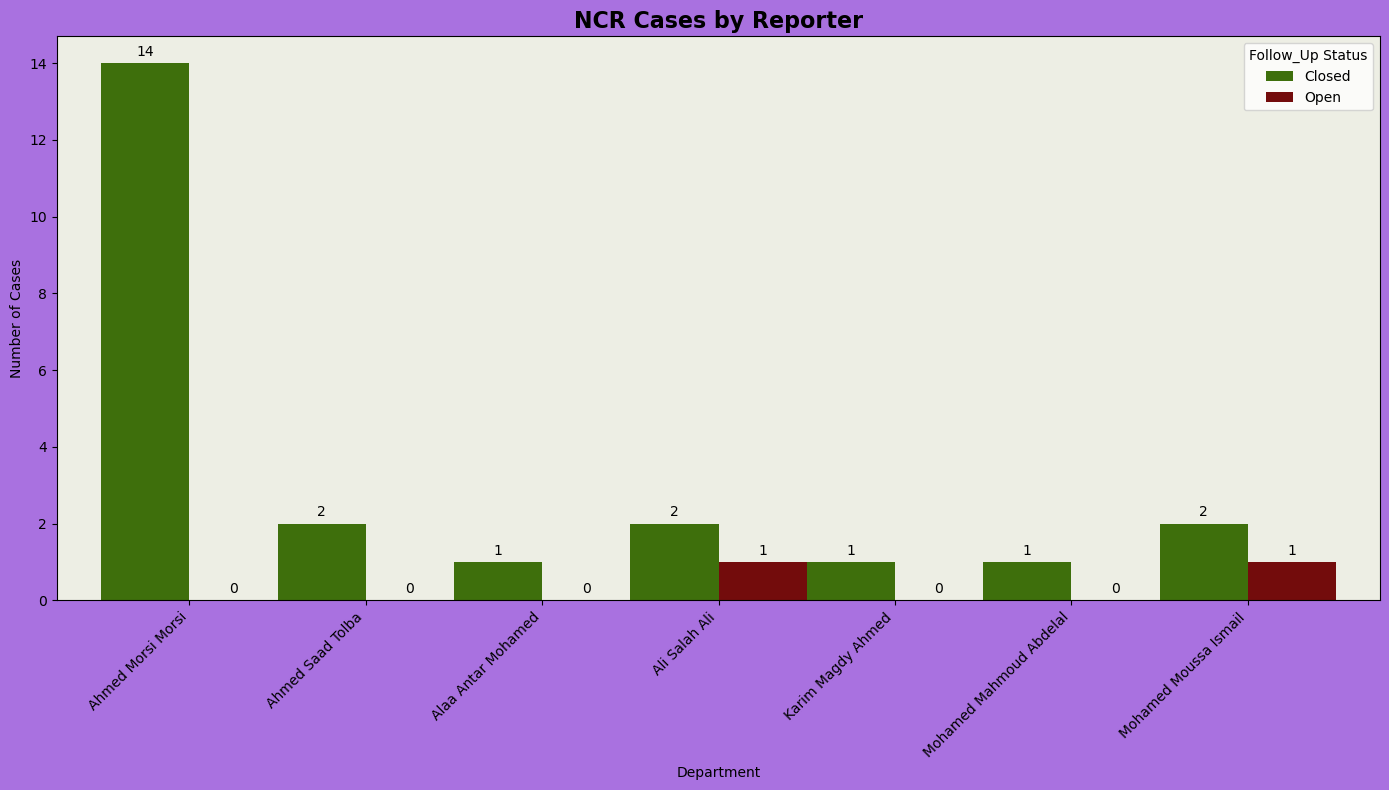

In [22]:
# 2. رسم بياني للحالات حسب القسم
plt.figure(figsize=(14, 8))
ax2 = reporter_pivo.plot(kind='bar', figsize=(14, 8), color=["#3E6F0C", "#730C0C"], width=1.0)
plt.title('NCR Cases by Reporter', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax2.set_facecolor("#edeee4")  # لون خلفية الرسم البياني
plt.gcf().set_facecolor("#a971e0")  # لون خلفية الشكل

# إضافة القيم على الأعمدة
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)
#لحفظ الرسم
plt.savefig('/home/hesham/NMG/8-25/NCR Cases by Department.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())
plt.show()

In [37]:
dep_pivo=pd.pivot_table(data=df,index="Department",values='Reporter_Name',columns='Follow_Up',aggfunc="count",fill_value=0)
dep_pivo

Follow_Up,Closed,Opened
Department,,
Administrative Affairs,4,0
Binding,2,0
Engineering Department,5,0
IT,0,1
Production,1,0
Sheet Printing,1,0
Stores,1,0
Web,9,1


<Figure size 1400x800 with 0 Axes>

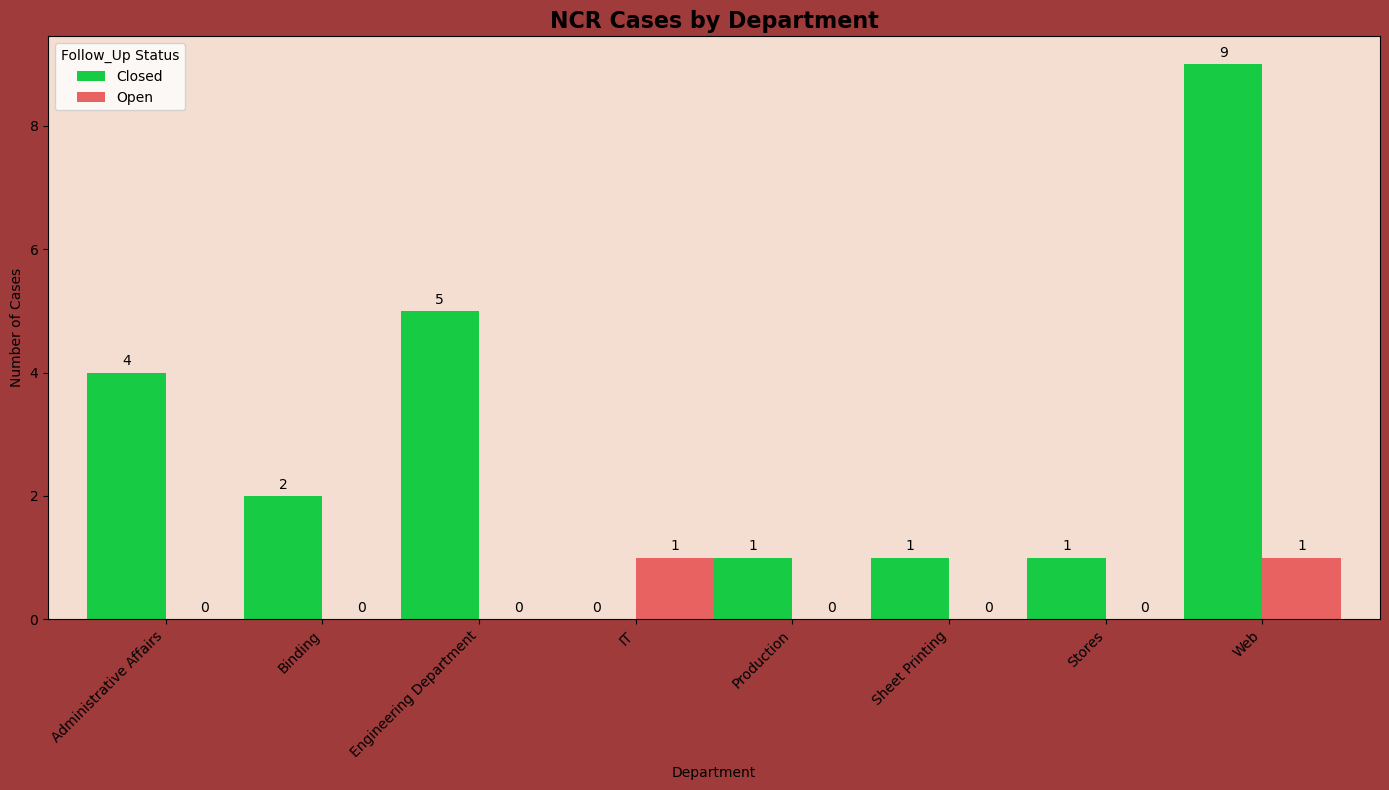

In [40]:
# 2. رسم بياني للحالات حسب القسم
plt.figure(figsize=(14, 8))
ax2 = dep_pivo.plot(kind='bar', figsize=(14, 8), color=['#17CB44', '#E86262'], width=1.0)
plt.title('NCR Cases by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(['Closed', 'Open'], title='Follow_Up Status')
plt.tight_layout()

# تنسيق الخلفية
ax2.set_facecolor("#f3ded1")  # لون خلفية الرسم البياني
plt.gcf().set_facecolor("#a03b3b")  # لون خلفية الشكل

# إضافة القيم على الأعمدة
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)
#لحفظ الرسم
plt.savefig('/home/hesham/NMG/8-25/NCR Cases by Department.png', dpi=300, bbox_inches='tight', facecolor=plt.gca().get_facecolor())
plt.show()